In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

O quão frustrante o jogo pode ser para certos jogadores?

A ideia principal é analisar as quantias de derrotas e o tempo de jogo, para poder ter algum insight sobre essa pergunta

In [225]:
df_players = pd.read_csv("jogadores.csv")
df_matches = pd.read_csv("partidas.csv")

In [252]:
mpl.rcParams['axes.facecolor'] = "#FFFFFF00"
mpl.rcParams['figure.facecolor'] = "#FFFFFF00"
mpl.rcParams['text.color'] = "white"
mpl.rcParams['axes.labelcolor'] = "white"
mpl.rcParams['xtick.color'] = "white"
mpl.rcParams['ytick.color'] = "white"

In [226]:
df_players = df_players[["nome","rank","idade","email"]]
df_matches_with_draw = df_matches.copy()
df_matches = df_matches[df_matches["score1"]!=df_matches["score2"]].reset_index(drop = True)

In [227]:
df_matches["p1_venceu"] = (df_matches["score1"]>df_matches["score2"])
df_players["vitorias"] = 0
df_players["partidas-jogadas"] = 0
for i in range(df_matches.shape[0]):
    linha = df_matches.iloc[i]
    win = linha["p1_venceu"].copy()
    p1 = linha["p1"].copy()
    p2 = linha["p2"].copy()
    if win:
        n = df_players.loc[p1,"vitorias"].copy() + 1
        df_players.loc[p1,"vitorias"] = n.copy()
    else:
        n = df_players.loc[p2,"vitorias"].copy() + 1
        df_players.loc[p2,"vitorias"] = n.copy()
    n = df_players.loc[p1,"partidas-jogadas"].copy() + 1
    df_players.loc[p1,"partidas-jogadas"] = n.copy()

    n = df_players.loc[p2,"partidas-jogadas"].copy() + 1
    df_players.loc[p2,"partidas-jogadas"] = n.copy()

df_players["derrotas"]=df_players["partidas-jogadas"]-df_players["vitorias"]
df_players["perc_vit"]=df_players["vitorias"]/df_players["partidas-jogadas"]
df_players.sort_values(by=["derrotas"],ascending=False).head(10)

,nome,rank,idade,email,vitorias,partidas-jogadas,derrotas,perc_vit
447,Patata414,2,20,Patata414@gmail.com,0,16,16,0.000000
514,Jinx305,10,10,Jinx305@hotmail.com,1,13,12,0.076923
59,Flixzer,1,16,Flixzer@gmail.com,0,11,11,0.000000
173,Hiei,0,13,Hiei@hotmail.com,0,11,11,0.000000
301,Slambert_32,13,15,Slambert_32@hotmail.com,2,13,11,0.153846
394,charlesjogos_11,0,20,charlesjogos_11@gmail.com,0,11,11,0.000000
544,BlackBlockShock986,0,21,BlackBlockShock986@gmail.com,0,10,10,0.000000
527,Miller561,18,26,Miller561@gmail.com,4,14,10,0.285714
559,Tokoyami468,0,22,Tokoyami468@gmail.com,0,10,10,0.000000
510,Vox388,10,22,Vox388@outlook.com,0,10,10,0.000000


Encontramos então a seleção de jogadores que mais perderam, o lider deles é curiosamente o jogador que também tem o maior numero de partidas... E ele perdeu todas... Pobre Patata414.

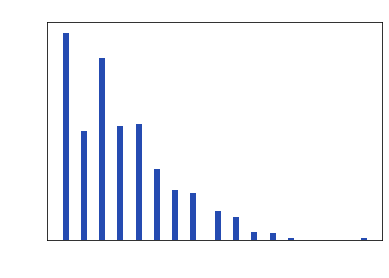

In [256]:
plt.hist(df_players["derrotas"],50, facecolor="#254bb1")
plt.xlabel('N. Derrotas')
plt.ylabel('Frequencia')
plt.title('Distribuição de derrotas')
plt.savefig("teste")

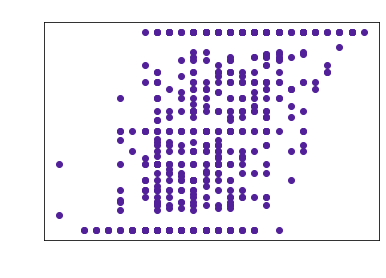

In [261]:
plt.scatter(df_players["idade"],df_players["perc_vit"], color="#52219a")
plt.xlabel('Idade')
plt.ylabel('Taxa de vitoria')
plt.title('Relação entre idade e sucesso')
plt.show()

A partir dessa visualização, é possível dizer que a idade não possui influencia considerável para a taxa de sucesso.

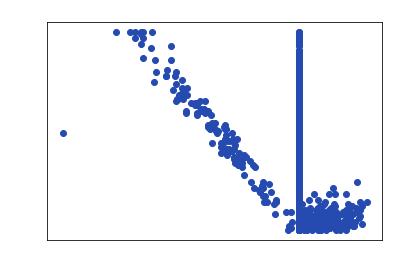

In [262]:
df_matches = df_matches_with_draw.copy()
df = pd.merge(df_matches, df_players.reset_index(), left_on="p1", right_on="index")[["p1","p2","score1","score2","tempo","nome","rank"]]
df.rename(columns={"nome":"p1_nome","rank":"p1_rank"}, inplace=True)
df = pd.merge(df, df_players.reset_index(), left_on="p2", right_on="index")[["p1","p2","score1","score2","tempo","p1_nome","p1_rank","nome","rank"]]
df.rename(columns={"nome":"p2_nome","rank":"p2_rank"}, inplace=True)
df["diferenca"] = abs(df["p1_rank"] - df["p2_rank"])

# mpl.rcParams['axes.facecolor'] = "#1f1f1f"
# mpl.rcParams['figure.facecolor'] = "#1f1f1f"
# mpl.rcParams['text.color'] = "white"
# mpl.rcParams['axes.labelcolor'] = "white"
# mpl.rcParams['xtick.color'] = "white"
# mpl.rcParams['ytick.color'] = "white"

plt.xlabel('Tempo em segundos')
plt.ylabel('Diferença de mmr')
plt.title('Duração de partidas X desnível de mmr')


plt.scatter(df["tempo"],df["diferenca"],color="#254bb1" )

Temos uma linha vertical sobre o 600, pois 10 minutos é o tempo normal de uma partida, mas podemos perceber que com diferenças mais altas, ocorre uma derrota muita rápida do oponente por limite de pontos. E em partidas equilibradas, é comum ir para a prorrogação e demorar mais.
(além disso tem um ponto alí que é algum erro na base, mas poderia ser um hacker identificado)